In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Linear Regression for the house price prediction dataset from UCI repository

In [9]:
import pandas as pd
house=pd.read_csv('drive/My Drive/Colab Notebooks/house_price.csv')

In [10]:
house

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [11]:
x=house.iloc[:,1:7].values
x

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

In [12]:
y=house.iloc[:,7].values
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [19]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=regressor.predict(x_test)

Linear Regression along with PCA

In [28]:

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72208592])

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=regressor.predict(x_test)

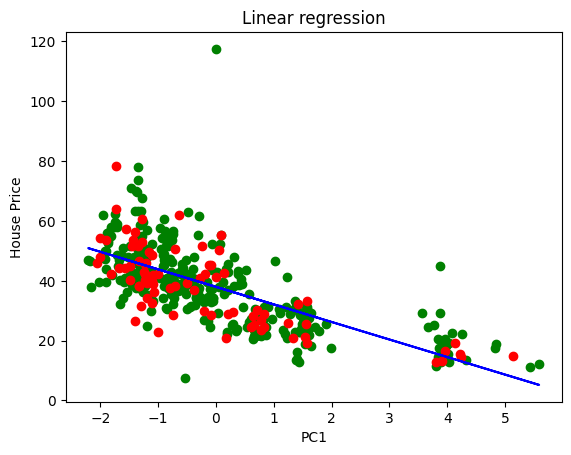

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Linear regression')
plt.xlabel('PC1')
plt.ylabel('House Price')
plt.show()

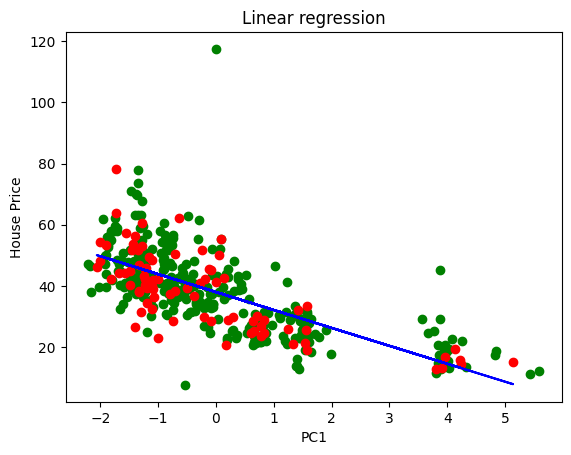

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Linear regression')
plt.xlabel('PC1')
plt.ylabel('House Price')
plt.show()